In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-secant-iqi)

Here we look for a root of $x+\cos(10x)$ that is close to 1.

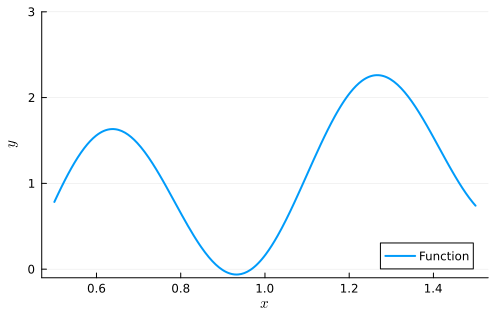

In [2]:
f(x) = x + cos(10 * x)
interval = [0.5, 1.5]

plot(f, interval..., label="Function", legend=:bottomright,
    grid=:y, ylim=[-0.1, 3], xlabel=L"x", ylabel=L"y")

We choose three values to get the iteration started.

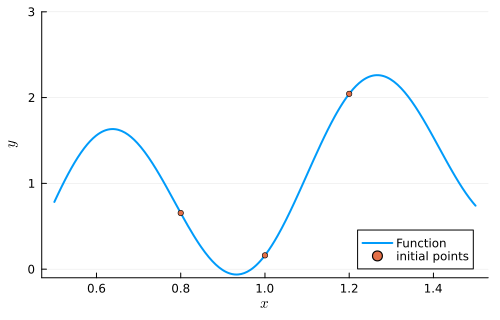

In [3]:
x = [0.8, 1.2, 1]
y = @. f(x)
scatter!(x, y, label="initial points")

If we were using forward interpolation, we would ask for the polynomial interpolant of $y$ as a function of $x$. But that parabola has no real roots.

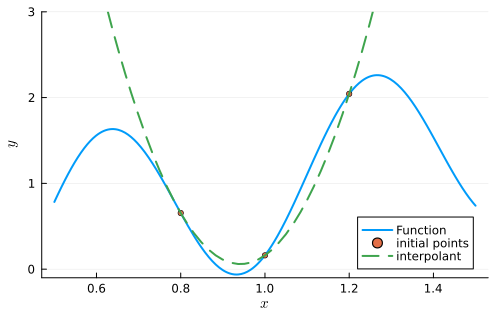

In [4]:
using Polynomials
q = Polynomials.fit(x, y, 2)      # interpolating polynomial
plot!(x -> q(x), interval..., l=:dash, label="interpolant")

To do inverse interpolation, we swap the roles of $x$ and $y$ in the interpolation.
:::
```{tip}
:class: dropdown
By giving two functions in the plot call, we get the parametric plot $(q(y),y)$ as a function of $y$.
```

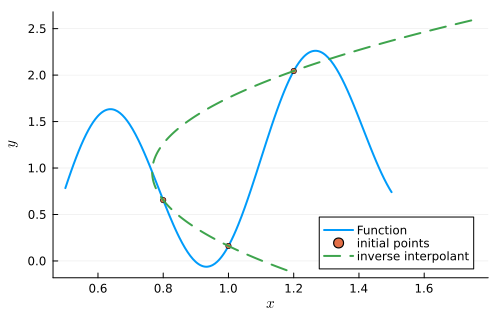

In [5]:
plot(f, interval..., label="Function",
    legend=:bottomright, grid=:y, xlabel=L"x", ylabel=L"y")
scatter!(x, y, label="initial points")

q = Polynomials.fit(y, x, 2)       # interpolating polynomial
plot!(y -> q(y), y -> y, -0.1, 2.6, l=:dash, label="inverse interpolant")

We seek the value of $x$ that makes $y$ zero. This means evaluating $q$ at zero.

In [6]:
q(0)

1.1039813854404716

Let's restart the process with `BigFloat` numbers to get a convergent sequence.

In [7]:
x = BigFloat.([8, 12, 10]) / 10
y = @. f(x)

for k = 3:12
    q = Polynomials.fit(y[k-2:k], x[k-2:k], 2)
    push!(x, q(0))
    push!(y, f(x[k+1]))
end

println("residual = $(f(x[end]))")

residual = 0.0


As far as our current precision is concerned, we have an exact root.

In [8]:
r = x[end]
ϵ = @. Float64(abs(r - x[1:end-1]))
logerr = @. log10(abs(ϵ))
ratios = [NaN; [logerr[i+1] / logerr[i] for i in 1:length(logerr)-1]]
@pt :header=["iteration", "error", "log error", "ratio"] [eachindex(ϵ) ϵ logerr ratios]

iteration,error,log error,ratio
1.0,0.167888,-0.774979,NaN
2.0,0.232112,-0.634303,0.818478
3.0,0.0321116,-1.49334,2.3543
4.0,0.136093,-0.866164,0.580019
5.0,0.0153473,-1.81397,2.09425
6.0,0.00326831,-2.48568,1.3703
7.0,0.000461744,-3.3356,1.34193
8.0,6.29585e-6,-5.20095,1.55922
9.0,3.43898e-9,-8.46357,1.62731
10.0,3.87305e-15,-14.4119,1.70282


The convergence is probably superlinear at a rate of $\alpha=1.8$ or so.